In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import joblib


In [2]:
df = pd.read_csv(r"C:\Users\NandhaKishore\Desktop\Data_Science_project\DATA_SETS\vehicle_insurance_claim_dataset.csv")
df.head()


,Driver_Age,Vehicle_Age,Annual_Mileage,Accident_History,Vehicle_Type,Policy_Type,Claim
0,56,12,28475,4,Car,Premium,0
1,69,6,15647,4,Bike,Premium,0
2,46,14,12911,1,Bike,Basic,0
3,32,4,11472,1,Car,Premium,1
4,60,5,21271,0,Bike,Premium,0


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Driver_Age        500 non-null    int64 
 1   Vehicle_Age       500 non-null    int64 
 2   Annual_Mileage    500 non-null    int64 
 3   Accident_History  500 non-null    int64 
 4   Vehicle_Type      500 non-null    object
 5   Policy_Type       500 non-null    object
 6   Claim             500 non-null    int64 
dtypes: int64(5), object(2)
memory usage: 27.5+ KB


In [19]:
df.shape

(500, 7)

In [20]:
df.isnull().sum()

Driver_Age          0
Vehicle_Age         0
Annual_Mileage      0
Accident_History    0
Vehicle_Type        0
Policy_Type         0
Claim               0
dtype: int64

In [21]:
vehicle_encoder = LabelEncoder()
policy_encoder = LabelEncoder()
df["Vehicle_Type"] = vehicle_encoder.fit_transform(df["Vehicle_Type"])
df["Policy_Type"] = policy_encoder.fit_transform(df["Policy_Type"])


In [22]:
X = df.drop("Claim", axis=1)
y = df["Claim"]


In [23]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [24]:
rf = RandomForestClassifier(
    n_estimators=100,
    random_state=42
)

rf.fit(X_train, y_train)


,"n_estimators n_estimators: int, default=100The number of trees in the forest... versionchanged:: 0.22 The default value of ``n_estimators`` changed from 10 to 100 in 0.22.",100
,"criterion criterion: {""gini"", ""entropy"", ""log_loss""}, default=""gini""The function to measure the quality of a split. Supported criteria are""gini"" for the Gini impurity and ""log_loss"" and ""entropy"" both for theShannon information gain, see :ref:`tree_mathematical_formulation`.Note: This parameter is tree-specific.",'gini'
,"max_depth max_depth: int, default=NoneThe maximum depth of the tree. If None, then nodes are expanded untilall leaves are pure or until all leaves contain less thanmin_samples_split samples.",None
,"min_samples_split min_samples_split: int or float, default=2The minimum number of samples required to split an internal node:- If int, then consider `min_samples_split` as the minimum number.- If float, then `min_samples_split` is a fraction and `ceil(min_samples_split * n_samples)` are the minimum number of samples for each split... versionchanged:: 0.18 Added float values for fractions.",2
,"min_samples_leaf min_samples_leaf: int or float, default=1The minimum number of samples required to be at a leaf node.A split point at any depth will only be considered if it leaves atleast ``min_samples_leaf`` training samples in each of the left andright branches. This may have the effect of smoothing the model,especially in regression.- If int, then consider `min_samples_leaf` as the minimum number.- If float, then `min_samples_leaf` is a fraction and `ceil(min_samples_leaf * n_samples)` are the minimum number of samples for each node... versionchanged:: 0.18 Added float values for fractions.",1
,"min_weight_fraction_leaf min_weight_fraction_leaf: float, default=0.0The minimum weighted fraction of the sum total of weights (of allthe input samples) required to be at a leaf node. Samples haveequal weight when sample_weight is not provided.",0.0
,"max_features max_features: {""sqrt"", ""log2"", None}, int or float, default=""sqrt""The number of features to consider when looking for the best split:- If int, then consider `max_features` features at each split.- If float, then `max_features` is a fraction and `max(1, int(max_features * n_features_in_))` features are considered at each split.- If ""sqrt"", then `max_features=sqrt(n_features)`.- If ""log2"", then `max_features=log2(n_features)`.- If None, then `max_features=n_features`... versionchanged:: 1.1 The default of `max_features` changed from `""auto""` to `""sqrt""`.Note: the search for a split does not stop until at least onevalid partition of the node samples is found, even if it requires toeffectively inspect more than ``max_features`` features.",'sqrt'
,"max_leaf_nodes max_leaf_nodes: int, default=NoneGrow trees with ``max_leaf_nodes`` in best-first fashion.Best nodes are defined as relative reduction in impurity.If None then unlimited number of leaf nodes.",None
,"min_impurity_decrease min_impurity_decrease: float, default=0.0A node will be split if this split induces a decrease of the impuritygreater than or equal to this value.The weighted impurity decrease equation is the following:: N_t / N * (impurity - N_t_R / N_t * right_impurity - N_t_L / N_t * left_impurity)where ``N`` is the total number of samples, ``N_t`` is the number ofsamples at the current node, ``N_t_L`` is the number of samples in theleft child, and ``N_t_R`` is the number of samples in the right child.``N``, ``N_t``, ``N_t_R`` and ``N_t_L`` all refer to the weighted sum,if ``sample_weight`` is passed... versionadded:: 0.19",0.0
,"bootstrap bootstrap: bool, default=TrueWhether bootstrap samples are used when building trees. If False, thewhole dataset is used to build each tree.",True
,"oob_score oob_score: bool or callable, default=FalseWhether to use out-of-bag samples to estimate the generalization score.By default, :func:`~sklearn.metrics.accuracy_score` is used.Provide a callable with signature `metric

In [10]:
print(len(rf.estimators_))     
tree = rf.estimators_[0]      
print(tree)



100
DecisionTreeClassifier(max_features='sqrt', random_state=1608637542)


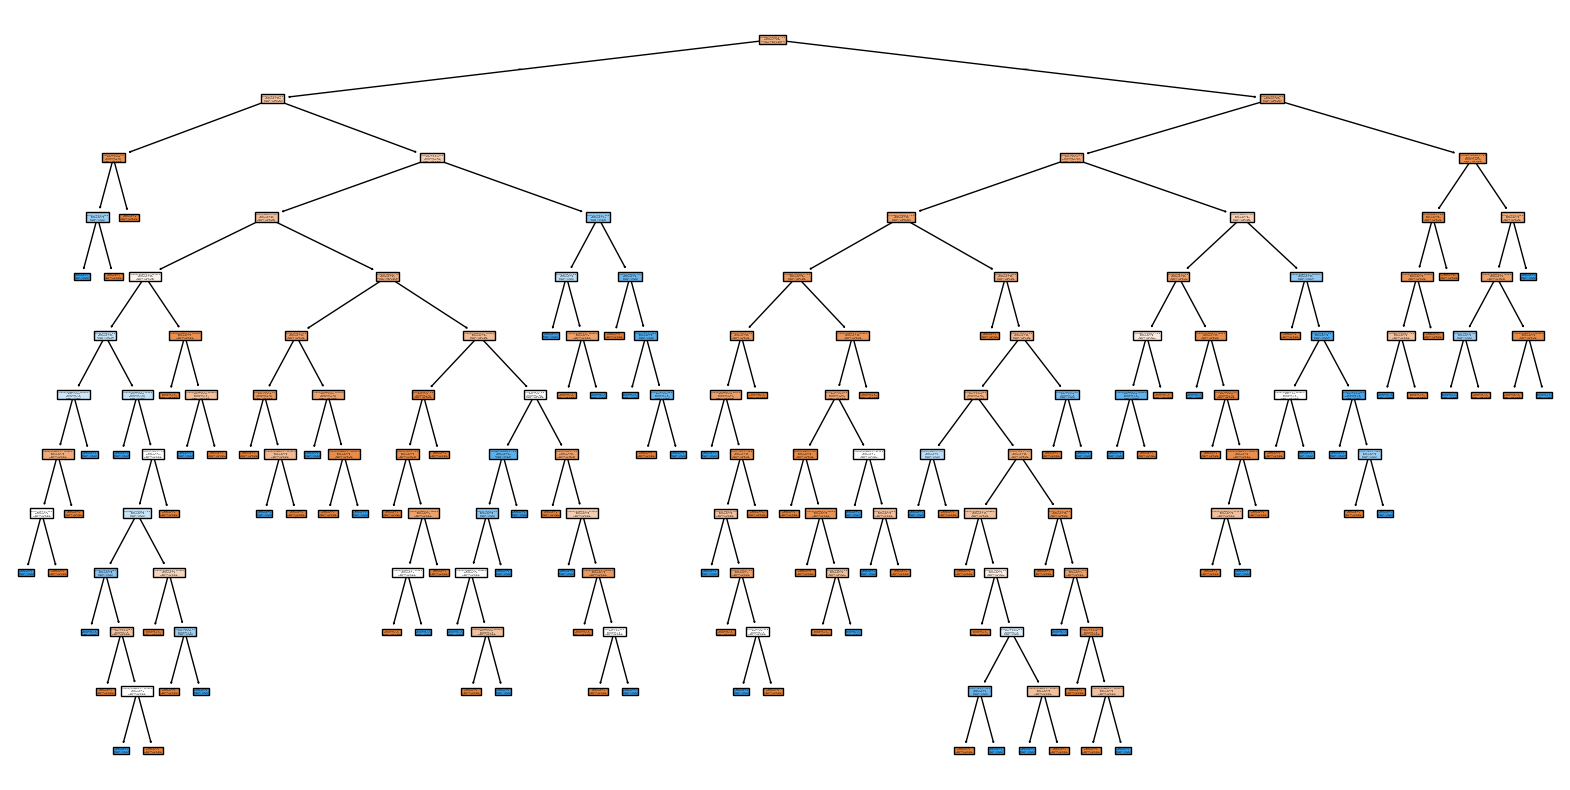

In [11]:
from sklearn.tree import plot_tree

plt.figure(figsize=(20,10))
plot_tree(
    rf.estimators_[0],
    feature_names=X.columns,
    class_names=["No Claim", "Claim"],
    filled=True
)
plt.show()


In [12]:
y_pred = rf.predict(X_test)
print("Predicted:", y_pred.tolist())
print("Actual:   ", y_test.tolist())

Predicted: [0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0]
Actual:    [0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1]


In [13]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nClassification Report:\n")
print(classification_report(y_test, y_pred))


Accuracy: 0.66

Classification Report:

              precision    recall  f1-score   support

           0       0.69      0.90      0.78        68
           1       0.42      0.16      0.23        32

    accuracy                           0.66       100
   macro avg       0.55      0.53      0.50       100
weighted avg       0.60      0.66      0.60       100



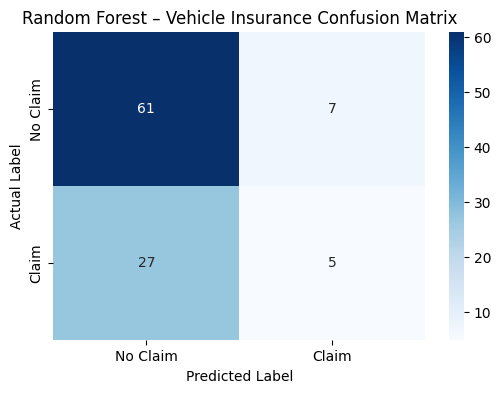

In [14]:
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(6,4))
sns.heatmap(
    cm,
    annot=True,
    fmt="d",
    cmap="Blues",
    xticklabels=["No Claim", "Claim"],
    yticklabels=["No Claim", "Claim"]
)
plt.xlabel("Predicted Label")
plt.ylabel("Actual Label")
plt.title("Random Forest – Vehicle Insurance Confusion Matrix")
plt.show()


In [25]:
joblib.dump(rf, "vehicle_insurance_rf.pkl")
joblib.dump(vehicle_encoder, "vehicle_encoder.pkl")
joblib.dump(policy_encoder, "policy_encoder.pkl")

print("✅ Model and encoders saved")


✅ Model and encoders saved
